In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline


In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv('../data/AB_NYC_2019.csv')
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [11]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [16]:
# Drop rows where 'name' or 'host_name' is missing
df = df.dropna(subset=['name', 'host_name'])

# Fill missing 'reviews_per_month' with 0 (assuming no reviews)
df['reviews_per_month'].fillna(0, inplace=True)

# Confirm all nulls are gone
df.isnull().sum()


C:\Users\91852\AppData\Local\Temp\ipykernel_15552\2682998160.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [17]:
df['price'].describe()

count    48858.000000
mean       152.740309
std        240.232386
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [18]:
df=df[df['price']<=500]

In [19]:
df=df[df['price']>0]

In [20]:
df.reset_index(drop=True,inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47803 entries, 0 to 47802
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              47803 non-null  int64  
 1   name                            47803 non-null  object 
 2   host_id                         47803 non-null  int64  
 3   host_name                       47803 non-null  object 
 4   neighbourhood_group             47803 non-null  object 
 5   neighbourhood                   47803 non-null  object 
 6   latitude                        47803 non-null  float64
 7   longitude                       47803 non-null  float64
 8   room_type                       47803 non-null  object 
 9   price                           47803 non-null  int64  
 10  minimum_nights                  47803 non-null  int64  
 11  number_of_reviews               47803 non-null  int64  
 12  last_review                     

In [22]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.780300e+04,4.780300e+04,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000
mean,1.898746e+07,6.717615e+07,40.728810,-73.951663,131.564483,6.963517,23.542958,1.100295,7.081564,111.223856
std,1.096577e+07,7.830844e+07,0.054775,0.046246,88.052259,19.883068,44.821364,1.604374,32.775614,130.970052
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.463150e+06,7.760462e+06,40.689825,-73.982670,68.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.962646e+07,3.055889e+07,40.722630,-73.955220,101.000000,2.000000,5.000000,0.380000,1.000000,43.000000
75%,2.908100e+07,1.072928e+08,40.763245,-73.935600,172.000000,5.000000,24.000000,1.610000,2.000000,221.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,500.000000,1250.000000,629.000000,58.500000,327.000000,365.000000



Room Type Distribution

C:\Users\91852\AppData\Local\Temp\ipykernel_15552\1957173612.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='room_type',palette='pastel')


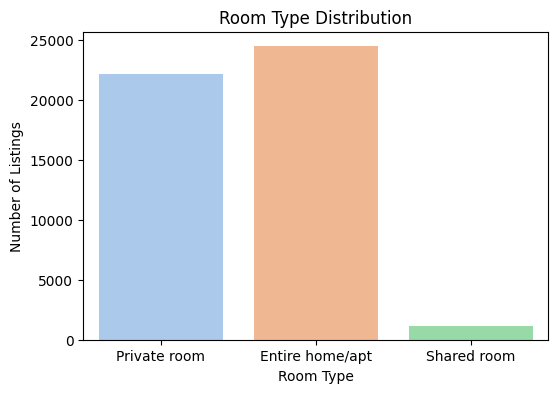

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='room_type',palette='pastel')
plt.title("Room Type Distribution")
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.show()

Listings By Neighbourhood Group

C:\Users\91852\AppData\Local\Temp\ipykernel_15552\248796492.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='neighbourhood_group',palette='Set2')


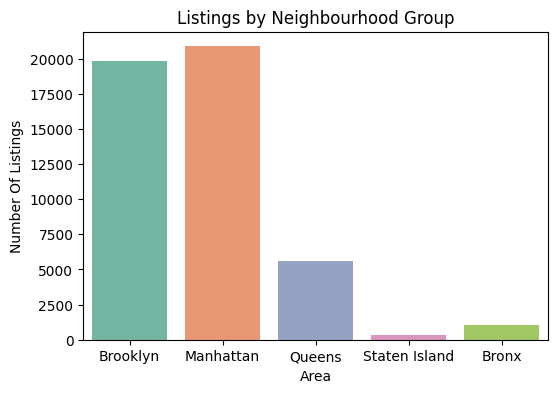

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='neighbourhood_group',palette='Set2')
plt.title('Listings by Neighbourhood Group')
plt.xlabel("Area")
plt.ylabel("Number Of Listings")
plt.show()

Price Distribution

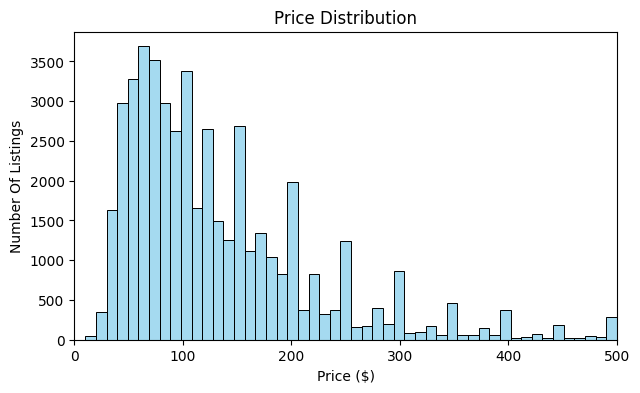

In [27]:
plt.figure(figsize=(7,4))
sns.histplot(data=df,x='price',bins=50,color='skyblue')
plt.title("Price Distribution")
plt.xlabel("Price ($)")
plt.ylabel("Number Of Listings")
plt.xlim(0,500)
plt.show()

Average Price by Room Type

C:\Users\91852\AppData\Local\Temp\ipykernel_15552\1919555283.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='room_type',y='price',palette='muted')


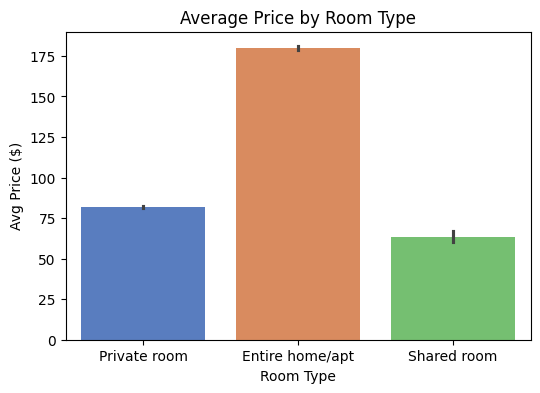

In [29]:
plt.figure(figsize=(6,4))
sns.barplot(data=df,x='room_type',y='price',palette='muted')
plt.title("Average Price by Room Type")
plt.xlabel("Room Type")
plt.ylabel('Avg Price ($)')
plt.show()

Reviews vs Room Type

C:\Users\91852\AppData\Local\Temp\ipykernel_15552\94619931.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df,x='room_type',y='reviews_per_month',palette='cool')


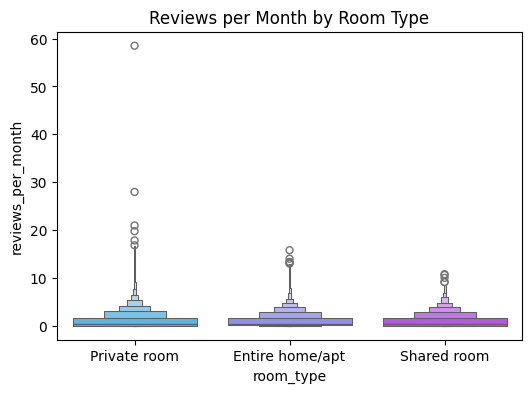

In [31]:
plt.figure(figsize=(6,4))
sns.boxenplot(data=df,x='room_type',y='reviews_per_month',palette='cool')
plt.title("Reviews per Month by Room Type")
#plt.xlim(0,10)
plt.show()

Map Of Listings

In [5]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('../data/AB_NYC_2019.csv')

# Create the scatter map plot
fig = px.scatter_map(
    df.sample(1000),  # Only show 1000 points for speed
    lat="latitude",
    lon="longitude",
    color="price",
    size="price",
    hover_name="name",
    hover_data=["neighbourhood", "room_type", "price"],
    color_continuous_scale=px.colors.cyclical.IceFire,
    zoom=10,
    height=500
)

# Update layout
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(title="Airbnb Listings in NYC (Sample View)")

# Save to HTML (works in all environments)
fig.write_html("airbnb_map.html")


In [ ]:
df.to_csv('cleaned_airbnb_data.csv', index=False)
